### [Figure 1 Diagnostics](#figure1)<a id='top'></a>

### [Figure 2 Evolution of detachment](#figure2)

Figure 3 Profiles LFS/HFS

Figure 4 \#30733

Figure 5

Figure 6

Figure 7

Figure 8

Figure 9

ELM cycles

# Figure 1 Diagnostics<a id='figure1'></a> [(TOP) ](#top)

In [3]:
import matplotlib.pylab as plt
import matplotlib.path
import matplotlib as mpl
import numpy as np
from closest import *
from readVessel import readVessel
import pickle
from GetDiagnosticCoords import GetDiagnosticCoords
#
plt.style.use('helvet')
#
shotnr = 30554
    
#index = closest(t, 2.5)
arr = readVessel('./SupportFiles/vessel_32223.txt')

with open('SupportFiles/Equilibrium_Example.txt') as f:
    R, Z, EqMat = pickle.load(f)
    
#Diags
#Density diagnostics
refl = np.loadtxt('/home/guimas/Documents/MagConf/Diagnostic_Locations/Ref_LFS.txt')
refh = np.loadtxt('/home/guimas/Documents/MagConf/Diagnostic_Locations/Ref_HFS.txt')
h1 = np.loadtxt('/home/guimas/Documents/MagConf/Diagnostic_Locations/H1.coords')
h5 = np.loadtxt('/home/guimas/Documents/MagConf/Diagnostic_Locations/H5.coords')
#Probes
prob = np.loadtxt('/home/guimas/Documents/MagConf/Diagnostic_Locations/probes.coords')
#Div Vis Spec.
fvsr, fvsz, fvsphi = GetDiagnosticCoords('/home/guimas/Documents/MagConf/Diagnostic_Locations/FVS.coords')

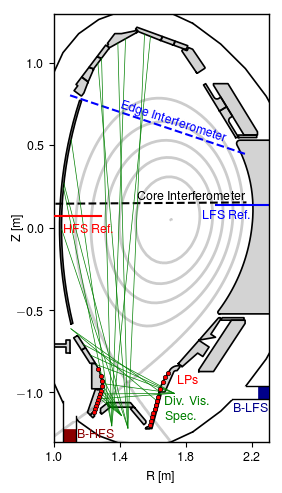

In [6]:
fig = plt.figure(figsize=(3, 5), dpi=100)
linew = 2
ax1 = fig.add_subplot(111)

#se = ax1.contour(R, Z, ((pfm[:,:,:] - psi0)/(psix-psi0))[:,:,index].T,
#                 levels=cntrlvls, linewidths=linew, colors='k', alpha=0.2)

ax1.set_aspect('equal', adjustable='box')
ax1.set_xlabel("R [m]")
ax1.set_ylabel("Z [m]", labelpad=-4)
ax1.set_xticks([1.0,1.4,1.8,2.2])
ax1.set_xlim([1.0, 2.3])
ax1.set_ylim([-1.3, 1.3])


##Fill, then plot Vessel structure
for entry in arr:
    r = entry[:,0]
    z = entry[:,1]
    #Check if it's the cessel outline
    if ((min(r)<1.1) & (max(r)>2.0) & (min(z)<1) & (max(z)>1)):
        a=0 #Do nothing
    else:
        ax1.fill(entry[:,0], entry[:,1], color='#D3D3D3')

for entry in arr:
    ax1.plot(entry[:,0], entry[:,1], color='k', lw=1.2)


cntrlvls = [0.001, 0.2, 0.4, 0.6, 0.8, 1.0]
se = ax1.contour(R, Z, EqMat,
                 levels=cntrlvls, linewidths=2, colors='k', alpha=0.2)

#Plot diagnostics
#Langmuir probes
plt.scatter(prob[:,0], prob[:,1], s=10, color='r', edgecolors='k', zorder=10)
plt.text(1.75, -0.95, 'LPs', color='r')
#FMCW
ldiag = 1.5
plt.plot(refh[:,0], refh[:,1], color='r', lw=ldiag, zorder=100)
plt.text(1.06,-0.03,'HFS Ref.',color='r', zorder=100)

plt.plot(refl[:,0], refl[:,1], color='b', lw=ldiag)
plt.text(1.9, 0.05, 'LFS Ref.',color='blue')
#Interferometers
plt.plot(h1[:,0],h1[:,1], color='black', ls='--', lw=ldiag)
plt.text(1.5,0.17,'Core Interferometer',color='k')

plt.plot(h5[:,0],h5[:,1], color='blue', ls='--', lw=ldiag)
plt.text(1.4,0.72,'Edge Interferometer',color='b',rotation=-18)
#
#Baratrons
#HFS
plt.axvspan(1.05, 1.13, ymin=0.05, ymax=0.16, color='w', zorder=3)
plt.axvline(1.05, ymin=-1.2, ymax=0.096, color='k',zorder=5, lw=1)
plt.axvline(1.13, ymin=-1.2, ymax=0.06, color='k',zorder=5, lw=1)
plt.axvspan(1.05, 1.13, ymin=0.0, ymax=0.03, color='darkred', zorder=4)
plt.text(1.14, -1.28, 'B-HFS', color='darkred')
#LFS
plt.axhspan(-0.96, -1.04, xmin=0.8, xmax=1, color='w', zorder=3)
plt.axhline(-0.96, xmin=0.895, xmax=1, color='k',zorder=5, lw=1)
plt.axhline(-1.04, xmin=0.83, xmax=1, color='k',zorder=5, lw=1)
plt.axhspan(-0.96, -1.04, xmin=0.95, xmax=1, color='darkblue', zorder=4)
plt.text(2.085, -1.12, 'B-LFS', color='darkblue')
#
#Divertor visible spectroscopy
plt.text(1.67, -1.17, 'Div. Vis.\nSpec.', color='g')
#for line in range(1,len(fvsr)):
for line in range(0,len(fvsr)):
    plt.plot([fvsr[line,0], fvsr[line,1]], [fvsz[line,0], fvsz[line,1]], color='g', lw=0.5)

#ne,iw line
#iwline = 0
#plt.plot([fvsr[iwline,0], fvsr[iwline,1]], [fvsz[iwline,0], fvsz[iwline,1]], color='g', lw=2, ls='--')

#plt.text(1.16,-0.3,'$\mathrm{n_{e,iw}\,LOS}$',
#         rotation=np.arctan((fvsz[iwline,1]-fvsz[iwline,0])/(fvsr[iwline,1]-fvsr[iwline,0]))*180/np.pi,
#         color='g')
    
plt.tight_layout()
plt.savefig('./Figures/Figure1.png',dpi=300)
plt.show()

# Figure 2 Evolution of Detachment<a id='figure2'></a> [(TOP) ](#top)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from savitzky_golay import *
from smoothAm import smoothAm
import dd
from getsig import getsig
#
plt.style.use('helvet')
#
shotnr = 30554

rl05 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_0.500000')
rl10 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_1.00000')
rl20 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_2.00000')
rl30 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_3.00000')
#rl40 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_4.00000')

raus = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/FPG.Raus')

rh05 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_0.500000')
rh10 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_1.00000')
rh20 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_2.00000')
rh30 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_3.00000')
#rh40 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_4.00000')
rin = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/FPG.Rin')

dtot = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/UVS.D_tot')
tdtot = dtot[:,0]
sdtot = dtot[:,1]*1e-22

ntot = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/UVS.N_tot')
tntot = ntot[:,0]
sntot = ntot[:,1]*1e-22

tth = dd.shotfile('TTH', shotnr)
h98 = tth('H/L-facs')
tth.close()

##Heating
ecrh = np.loadtxt('/home/guimas/diags/' + str(shotnr) + '/ECS.PECRH')
nbi = np.loadtxt('/home/guimas/diags/' + str(shotnr) + '/NIS.PNI')
h1 = np.loadtxt('/home/guimas/diags/' + str(shotnr) + '/DCN.H-1')

dirdiv = "/home/guimas/Divertor/" + str(shotnr) + "/"
jsat = np.loadtxt(dirdiv + "kal2_jsat_out_" +str(shotnr)+ ".txt")
te = np.loadtxt(dirdiv + "kal2_te_out_" +str(shotnr)+ ".txt")
jsati = np.loadtxt(dirdiv + "kal2_jsat_in_" +str(shotnr)+ ".txt")
tei = np.loadtxt(dirdiv + "kal2_te_in_" +str(shotnr)+ ".txt")

asympar = np.loadtxt('/home/guimas/asym/'+str(shotnr)+'/aeval.'+str(shotnr))

sbd = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/krxv0006.txt')
tsbd = sbd[:,0]
ssbd = sbd[:,1]*1e-20

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


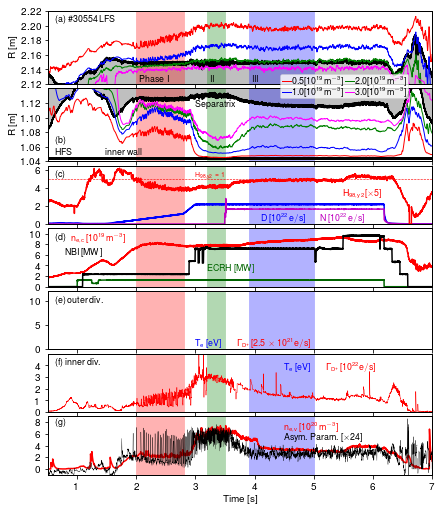

In [4]:
##Global linewidth
lwid = 1

mintime = 0.5
maxtime = 7.0

##Alpha setting
alphareg = 0.2
#tics size
ticfont = 10

f, axarr = plt.subplots(
        nrows=7, ncols=1, sharex=True, sharey=False, 
        gridspec_kw={'height_ratios':[5,5,4,4,4,4,4]},figsize=(6, 7))

###Global settings
ax1 = axarr[0]
ax2 = axarr[1]
ax3 = axarr[2]
ax4 = axarr[3]

ax1.text(2.05, 2.123, 'Phase I', color='k')
ax1.text(3.25, 2.123, 'II', color='k')
ax1.text(3.95, 2.123, 'III', color='k')

#Shaded regions
for axa in axarr:
    axa.axvspan(2.0, 2.8, color='red', alpha=0.3)
    axa.axvspan(3.2, 3.5, color='green', alpha=0.3)
    axa.axvspan(3.9, 5, color='blue', alpha=0.3)

#titlestr = '#' + str(shotnr) + ': ' + get_title(shotnr)
#plt.title(titlestr, fontsize=14)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

################################################
####First plot
################################################
lettx = 0.02
letty = 0.85
ax1.text(lettx, letty, '$\mathrm{(a)\,\#'+str(shotnr)+'\,LFS}$', transform=ax1.transAxes)

ax1.plot(raus[:,0], raus[:,1], color='black')

ax1.plot(rl05[:,0], rl05[:,1], color='red', label='0.5', linewidth=lwid)
ax1.plot(rl10[:,0], rl10[:,1], color='blue', label='1.0', linewidth=lwid)
ax1.plot(rl20[:,0], rl20[:,1], color='green', label='2.0', linewidth=lwid)

start30 = 0.5
m30 = rl30[:,0]>=start30
ax1.plot(rl30[m30,0], rl30[m30,1], color='magenta', label='3.0', linewidth=lwid)

# start40 = 1.7
# m40 = rl40[:,0]>=start40
# ax1.plot(rl40[m40,0], rl40[m40,1], color='orange', label='4.0', linewidth=lwid)

ax1.set_ylim([2.12,2.22])
ax1.set_yticks([2.12,2.14,2.16,2.18,2.20,2.22])

ax1.fill_between(raus[:,0], raus[:,1], 1.5, color='black', alpha=0.25)

#plt.yticks([2.05,2.07,2.09,2.11,2.13,2.15,2.17,2.19])

ax1.set_ylabel(r'$\mathrm{R\,[m]}$')
################################################
####Second plot
################################################
ax2 = axarr[1]

ax2.text(lettx, 0.25, '$\mathrm{(b)}$', transform=ax2.transAxes)
ax2.text(lettx, 0.085, '$\mathrm{HFS}$', transform=ax2.transAxes)

ax2.plot(rin[:,0], rin[:,1], color='black')

ax2.plot(rh05[:,0], rh05[:,1], color='red', label='$\mathrm{0.5[10^{19}m^{-3}]}$', linewidth=lwid)
ax2.plot(rh10[:,0], rh10[:,1], color='blue', label='$\mathrm{1.0[10^{19}m^{-3}]}$', linewidth=lwid)
ax2.plot(rh20[:,0], rh20[:,1], color='green', label='$\mathrm{2.0[10^{19}m^{-3}]}$', linewidth=lwid)

m30 = rh30[:,0]>=start30
ax2.plot(rh30[m30,0], rh30[m30,1], color='magenta', label='$\mathrm{3.0[10^{19}m^{-3}]}$', linewidth=lwid)

# m40 = rh40[:,0]>=start40
# ax2.plot(rh40[m40,0], rh40[m40,1], color='orange', label='$\mathrm{4.0[10^{19}m^{-3}]}$', linewidth=lwid)

#Legend
#plt.legend(loc='lower left', ncol=2, borderpad=0.2, labelspacing=0.1, columnspacing=0.2, handlelength=1, handletextpad=0.0, fancybox=True)
ax2.legend(bbox_to_anchor=(0.95,0.8), ncol=2, borderpad=0.2, labelspacing=0.1,
           columnspacing=0.2, handlelength=1, handletextpad=0.1, fancybox=True)

##Inner wall
ax2.text(0.15, 0.085, r'$\mathrm{inner\,wall}$', transform=ax2.transAxes)
ax2.hlines(1.045, mintime, maxtime, color='black', lw=3)

ylimax = 1.14
ylimin = 1.04
ax2.set_ylim([ylimin,ylimax])
ax2.set_yticks([1.04,1.06,1.08,1.10,1.12])

ax2.text(3.0,1.115,'Separatrix',color='k')

###Ta-da
ax2.set_ylabel(r'$\mathrm{R\,[m]}$')

ax2.fill_between(rin[:,0], rin[:,1], 1.5, color='black', alpha=0.25)

################################################
#### Third plot
################################################
ax6 = axarr[2]
ax6.text(lettx, letty-0.05, '$\mathrm{(c)}$', transform=ax6.transAxes)

dtotclr = '#0000FF'
ax6.plot(tdtot, sdtot, color=dtotclr)
ax6.text(4.1, 0.4, r'$\mathrm{D\,[10^{22}e/s]}$',color=dtotclr)

ntotclr = 'm'
ax6.plot(tntot, sntot, color=ntotclr)
ax6.text(5.1, 0.4, r'$\mathrm{N\,[10^{22}e/s]}$',color=ntotclr)

ax6.plot(h98.time, h98.data[:,7]*5, color='red')
ax6.axhline(5.0, lw=0.6, ls='--')
ax6.text(3.0,5.1, r'$\mathrm{H_{98,y2}=1}$', color='red',fontsize=7)
ax6.text(5.5, 3, r'$\mathrm{H_{98,y2}[\times5]}$', color='red')

ax6.set_yticks([0,2,4,6])
ax6.set_ylim(0,6.5)

################################################
#### Fourth plot
################################################
ax3 = axarr[3]
ax3.text(lettx, letty-0.05, '$\mathrm{(d)}$', transform=ax3.transAxes)

h1clr = '#FF0000'
ax3.plot(h1[:,0], h1[:,1]*1e-19, color=h1clr)
ax3.text(0.9, 8.5, r'$\mathrm{n_{e,c}\,[10^{19}m^{-3}]}$',color=h1clr)

ecrhclr = '#006400'
ax3.plot(ecrh[:,0], ecrh[:,1]*1e-6, color=ecrhclr) 
ax3.text(3.2, 3.0, r'$\mathrm{ECRH\,[MW]}$',color=ecrhclr)

nbiclr = '#000000'
ax3.plot(nbi[:,0], nbi[:,1]*1e-6, color=nbiclr) 
ax3.text(0.8, 6.0, r'$\mathrm{NBI\,[MW]}$',color=nbiclr)

ax3.set_xlim([mintime,maxtime])

ax3.set_yticks([0,2,4,6,8,10])
ax3.set_ylim([0,11])

for ax in axarr:
    ax.tick_params(labelsize=ticfont)
    ax.yaxis.label.set_size(ticfont)
    ax.xaxis.label.set_size(ticfont)

################################################
#### Fifth plot
################################################
ax4 = axarr[4]

ax4.text(lettx, letty-0.05, '$\mathrm{(e)\,outer\,div.}$', transform=ax4.transAxes)

#ax4.plot(jsat[:,0], savgol_filter(jsat[:,1]*4.0, 201, 3), color='red', lw=0.5)
ax4.text(3.7, 0.5, r'$\mathrm{\Gamma_{D^{+}}[2.5\times10^{21}e/s]}$', color='red')

#ax4.plot(te[:,0], savgol_filter(te[:,1], 201, 3), color='b', lw=0.5)
ax4.text(3.0, 0.5, r'$\mathrm{T_{e}\,[eV]}$', color='b')

ax4.set_ylim(0,12)
ax4.set_yticks([0,5,10])

#ax4.set_xlabel(r'$\mathrm{Time\,[s]}$', labelpad=2)
################################################################
################################################################
################################################
#### Sixth plot
################################################
ax5 = axarr[5]

ax5.text(lettx, letty-0.05, r'$\mathrm{(f)\,inner\,div.}$', transform=ax5.transAxes)

ax5.plot(jsati[:,0], jsati[:,1], color='red', lw=0.5)
ax5.text(5.2, 3.5, r'$\mathrm{\Gamma_{D^{+}}[10^{22}e/s]}$', color='red')

#ax5.plot(tei[:,0], savgol_filter(smoothAm(tei[:,1], 101), 101, 3), color='b', lw=0.5)
ax5.text(4.5, 3.5, r'$\mathrm{T_{e}\,[eV]}$', color='b')

ax5.set_ylim(0,5)
ax5.set_yticks([0,1,2,3,4])

ax5.set_ylim(bottom=0)
################################################################
ax7 = axarr[6]

sbdclr = '#FF0000'
ax7.plot(tsbd, ssbd, color=sbdclr)
ax7.text(4.5, 6.5, r'$\mathrm{n_{e,v}\,[10^{20}m^{-3}]}$', color=sbdclr)

ax7.text(lettx, letty, '$\mathrm{(g)}$', transform=ax7.transAxes)

ax7.plot(asympar[:,0], asympar[:,1]*2, color='k', lw=0.3)
ax7.text(4.5, 5.0, r'$\mathrm{Asym.\,Param.\,[\times24]}$', color='k')
ax7.set_ylim(-1,9)
ax7.set_yticks([0,2,4,6,8])
ax7.set_xlabel(r'$\mathrm{Time\,[s]}$', labelpad=2)
################################################################
################################################################

plt.subplots_adjust(left=0.1, bottom=0.06, right=0.99, top=0.98, wspace=0.1, hspace=0.07)

#plt.savefig("./Revised/Figure2.png", format='png', dpi=300)
plt.show()

# Figure 3 #30554 profiles

In [1]:
# %load /home/guimas/Documents/Publications/hmode2016/Figures/30554/perfsmt.py
import numpy as np
import matplotlib.pylab as plt
from perffromlays import *
#
plt.style.use('helvet')
#
shotnr = 30554
suf = ["0.500000","1.00000","2.00000","3.00000","4.00000"]
dens = [0.5, 1.0, 2.0, 3.0, 4.0]

perfh1, dh1, drh1 = perffromlays(shotnr, dens, suf, 2.3, side=0, poszero=1.05)
perfh2, dh2, drh2  = perffromlays(shotnr, dens, suf, 3.3, side=0, poszero=1.01)
perfh3, dh3, drh3  = perffromlays(shotnr, dens, suf, 4.5, side=0, poszero=1.02)

perfl1, dl1, drl1 = perffromlays(shotnr, dens, suf, 2.3, side=1, poszero=2.23)
perfl2, dl2, drl2  = perffromlays(shotnr, dens, suf, 3.3, side=1, poszero=2.25)
perfl3, dl3, drl3  = perffromlays(shotnr, dens, suf, 4.5, side=1, poszero=2.24)

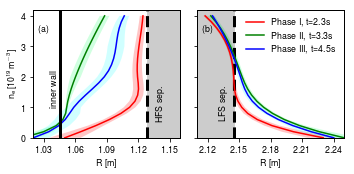

In [4]:
xi = 2.1
xf = 2.26

shotnr = 30554

#plt.figure(figsize=(9,5))
plt.figure(figsize=(5,2.5))

colorblue = '#66FFFF'
colormagenta = "#CC99FF"
colorred = "#FF4444"
colorgreen = "#66FF99"
alphaval = 0.3

ax1 = plt.subplot(121)
######
###HFS
######
xi = 1.02
xf = xi + 0.14

xtext = 0.03
ytext = 0.83
plt.text(xtext,ytext, '(a)', transform=ax1.transAxes)

plt.axvspan(1.128, 1.65, color='k', alpha=0.2)
plt.text(1.136, 1.5, 'HFS sep.', color="k", rotation="vertical")
plt.axvline(1.128, color='black', lw=3, ls='--')

plt.plot(perfh1, dh1, label="2.3s", color='red')
plt.fill_betweenx(dh1, perfh1-drh1, perfh1+drh1, facecolor=colorred, alpha=alphaval)
plt.plot(perfh2, dh2, label="3.3s", color='green')
plt.fill_betweenx(dh2, perfh2-drh2, perfh2+drh2, facecolor=colorgreen, alpha=alphaval)


plt.plot(perfh3, dh3, label="4.5s", color='blue')
drh3[0]=0.03/10
drh3[1]=0.02/10
drh3[2]=0.02/10
drh3[3]=0.02/10
drh3[4]=0.02/10
plt.fill_betweenx(dh3, perfh3-drh3*5, perfh3+drh3*5, facecolor=colorblue, alpha=alphaval)

plt.text(1.035, 2.0, 'inner wall', color="k", rotation="vertical")
plt.axvline(1.045, color='black', lw=3)
#plt.legend(loc='upper right')
plt.xlabel("R [m]")
plt.ylabel("$\mathrm{n_{e}\,[10^{19}m^{-3}}$]")
plt.xlim([xi,xf])
plt.xticks([1.03,1.06,1.09,1.12,1.15])

######
###LFS
######

ax2 = plt.subplot(122, sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)

xi = 2.11
xf = 2.25

plt.text(xtext,ytext, '(b)', transform=ax2.transAxes)
plt.axvspan(0.9,2.145, color='k', alpha=0.2)
plt.text(2.13, 1.5, 'LFS sep.', color="k", rotation="vertical")
plt.axvline(2.145, color='black', lw=3, ls='--')

plt.plot(perfl1, dl1, label="Phase I, t=2.3s", color='red')
plt.fill_betweenx(dl1, perfl1-drl1, perfl1+drl1, facecolor=colorred, alpha=alphaval)
plt.plot(perfl2, dl2, label="Phase II, t=3.3s", color='green')
plt.fill_betweenx(dl2, perfl2-drl2, perfl2+drl2, facecolor=colorgreen, alpha=alphaval)
plt.plot(perfl3, dl3, label="Phase III, t=4.5s", color='blue')
plt.fill_betweenx(dl3, perfl3-drl3, perfl3+drl3, facecolor=colorblue, alpha=alphaval)
plt.xlabel("R [m]")
#plt.ylabel("ne [$\mathrm{10^{19}m^{-3}}$]")
plt.xlim([xi,xf])
plt.xticks([2.12,2.15,2.18,2.21,2.24])
plt.legend(loc='upper right', frameon=False)

plt.subplots_adjust(left=0.08, bottom=0.16, right=0.98, top=0.98, wspace=0.04, hspace=0.07)
plt.ylim([0.0,4.2])
plt.tight_layout()
plt.savefig("Figures/Figure3.png", dpi=300)
plt.show()

# Figure 4 \#30733 Layers

In [3]:
import numpy as np
import matplotlib.pylab as plt
import dd
from getsig import getsig
from scipy.signal import medfilt
from smoothAm import smoothAm
#from kalman import kalman
#
plt.style.use('helvet')
#
shotnr = 30733

#eqdiag = 'GQH'
eqdiag = 'FPG'

rl05 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_0.500000')
rl10 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_1.00000')
rl20 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_2.00000')
rl30 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_3.00000')
rl40 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_4.00000')
raus = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/'+eqdiag+'.Raus')

rh05 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_0.500000')
rh10 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_1.00000')
rh20 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_2.00000')
rh30 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_3.00000')
rh40 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_4.00000')
rin = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/'+eqdiag+'.Rin')

dtot = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/UVS.D_tot')
tdtot = dtot[:,0]
sdtot = dtot[:,1]*1e-22

tth = dd.shotfile('TTH', shotnr)
h98 = tth('H/L-facs')
tth.close()

h1 = np.loadtxt('/home/guimas/diags/' + str(shotnr) + '/DCN.H-1')

ecrh = np.loadtxt('/home/guimas/diags/' + str(shotnr) + '/ECS.PECRH')
ecrhclr = '#00FF00'

nbi = np.loadtxt('/home/guimas/diags/' + str(shotnr) + '/NIS.PNI')
nbiclr = '#000000'

icrh = np.loadtxt('/home/guimas/diags/' + str(shotnr) + '/ICP.PICRN')
icrhclr = 'm'

dirdiv = "/home/guimas/Divertor/" + str(shotnr) + "/"
jsatl = np.loadtxt(dirdiv + "kal2_jsat_out_" +str(shotnr)+ ".txt")
# tel = np.loadtxt(dirdiv + "kal2_te_out_" +str(shotnr)+ ".txt")

jsath = np.loadtxt(dirdiv + "kal2_jsat_in_" +str(shotnr)+ ".txt")
# teh = np.loadtxt(dirdiv + "kal2_te_in_" +str(shotnr)+ ".txt")
tel = getsig(shotnr, 'LSD', 'te-ua3')

teh = getsig(shotnr, 'LSD', 'te-ui5')

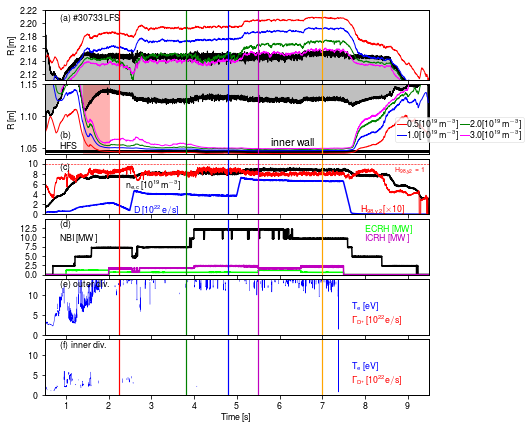

In [6]:
##Global linewidth
lwid = 1

mintime = 0.5
maxtime = 9.5

##Alpha setting
alphareg = 0.2

f, axarr = plt.subplots(
        nrows=6, ncols=1, sharex=True, sharey=False, 
        gridspec_kw={'height_ratios':[5,5,4,4,4,4]},figsize=(6, 6)) #6, 4.75

###Global settings
ax1 = axarr[0]
ax2 = axarr[1]
ax3 = axarr[2]
ax4 = axarr[3]

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

################################################
####First plot
################################################
lettx = 0.04
letty = 0.85
ax1.text(lettx, letty, r'$\mathrm{(a)\,\#'+str(shotnr)+'\,LFS}$', transform=ax1.transAxes)

ax1.plot(raus[:,0], raus[:,1], color='black', linewidth=lwid)

ax1.plot(rl05[:,0], rl05[:,1], color='red', label='0.5', linewidth=lwid)
ax1.plot(rl10[:,0], rl10[:,1], color='blue', label='1.0', linewidth=lwid)
ax1.plot(rl20[:,0], rl20[:,1], color='green', label='2.0', linewidth=lwid)

start30 = 0.5
m30 = rl30[:,0]>=start30
ax1.plot(rl30[m30,0], rl30[m30,1], color='magenta', label='3.0', linewidth=lwid)

# start40 = 0.5
# m40 = rl40[:,0]>=start40
# ax1.plot(rl40[m40,0], rl40[m40,1], color='orange', label='4.0', linewidth=lwid)

ax1.set_ylim([2.11,2.22])
ax1.set_yticks([2.12,2.14,2.16,2.18,2.20,2.22])

ax1.fill_between(raus[:,0], raus[:,1], 1.5, color='black', alpha=0.25)

ax1.set_ylabel(r'$\mathrm{R\,[m]}$')
################################################
####Second plot
################################################
ax2 = axarr[1]

ax2.text(lettx, 0.23, '(b)', transform=ax2.transAxes)
ax2.text(lettx, 0.085, 'HFS', transform=ax2.transAxes)

ax2.plot(rin[:,0], rin[:,1], color='black', linewidth=lwid)

ax2.plot(rh05[:,0], rh05[:,1], color='red', label='$\mathrm{0.5[10^{19}m^{-3}]}$', linewidth=lwid)
ax2.plot(rh10[:,0], rh10[:,1], color='blue', label='$\mathrm{1.0[10^{19}m^{-3}]}$', linewidth=lwid)
ax2.plot(rh20[:,0], rh20[:,1], color='green', label='$\mathrm{2.0[10^{19}m^{-3}]}$', linewidth=lwid)

m30 = rh30[:,0]>=start30
ax2.plot(rh30[m30,0], rh30[m30,1], color='magenta',
         label='$\mathrm{3.0[10^{19}m^{-3}]}$', linewidth=lwid)

# m40 = rh40[:,0]>=start40
# ax2.plot(rh40[m40,0], rh40[m40,1], color='orange',
#          label='$\mathrm{4.0[10^{19}m^{-3}]}$', linewidth=lwid)

#Legend
#plt.legend(loc='lower left', ncol=2, borderpad=0.2,
#labelspacing=0.1, columnspacing=0.2, handlelength=1, handletextpad=0.0, fancybox=True)
ax2.legend(bbox_to_anchor=(0.9,0.6), ncol=2, borderpad=0.2, labelspacing=0.1,
           columnspacing=0.2, handlelength=1, handletextpad=0.1, fancybox=True)

##Inner wall
ax2.text(5.8, 1.054, r'$\mathrm{inner\,wall}$', fontsize='large')
ax2.hlines(1.045, mintime, maxtime, color='black', lw=3)

ylimax = 1.15
ylimin = 1.04
ax2.set_ylim([ylimin,ylimax])
ax1.set_yticks([2.12,2.14,2.16,2.18,2.20,2.22])

###Ta-da
ax2.set_ylabel(r'$\mathrm{R\,[m]}$')
ax2.fill_between(rin[:,0], rin[:,1], 1.5, color='black', alpha=0.25)

################################################
#### Third plot
################################################
ax6 = axarr[2]
ax6.text(lettx, letty-0.05, '(c)', transform=ax6.transAxes)

#sbdclr = '#000000'
#ax6.plot(td, sd, color=sbdclr)
#ax6.text(1.5, 3.0, r'$\mathrm{n_{e,v}\,[10^{20}m^{-3}]}$', color=sbdclr)

dtotclr = '#0000FF'
ax6.plot(tdtot, sdtot, color=dtotclr)#, ls='--')
ax6.text(2.6, 0.4, r'$\mathrm{D\,[10^{22}e/s]}$',color=dtotclr)

h1clr = 'k'
ax6.plot(h1[:,0], h1[:,1]*1e-19, color=h1clr)
ax6.text(2.4, 5, r'$\mathrm{n_{e,c}\,[10^{19}m^{-3}]}$',color=h1clr)

ax6.plot(h98.time, h98.data[:,7]*10, color='red', lw=1)
ax6.text(7.9, 0.5, r'$\mathrm{H_{98,y2}[\times10]}$', color='red')
ax6.axhline(10, color='r', lw=0.6, ls='--')
ax6.text(8.7,9.5, r'$\mathrm{H_{98,y2}=1}$', color='red',fontsize=7,va='top')

ax6.set_yticks([0,2,4,6,8,10])
ax6.set_ylim((0, 11))
############################################################################
############################################################################
ax3 = axarr[3]

ax3.text(lettx, letty, '(d)', transform=ax3.transAxes)

ax3.plot(ecrh[:,0], ecrh[:,1]*1e-6, color=ecrhclr) 
ax3.text(8, 11.5, r'$\mathrm{ECRH\,[MW]}$',color=ecrhclr)
ax3.plot(nbi[:,0], nbi[:,1]*1e-6, color=nbiclr) 
ax3.text(0.85, 9.0, r'$\mathrm{NBI\,[MW]}$',color=nbiclr)
ax3.plot(icrh[:,0], icrh[:,1]*1e-6, color=icrhclr)
ax3.text(8.0, 9.0, r'$\mathrm{ICRH\,[MW]}$',color=icrhclr)

##Heating
ax3.set_xlim([mintime,maxtime])

ax3.set_yticks([0,2.5,5,7.5,10,12.5])
ax3.set_ylim([0,15])

################################################################
################################################################
ax4 = axarr[4]

ax4.text(lettx, letty, '(e) outer div.', transform=ax4.transAxes)

ax4.text(0.8, 0.2, r'$\mathrm{\Gamma_{D^{+}}[10^{22}e/s]}$', color='red', transform=ax4.transAxes)
ax4.text(0.8, 0.45, r'$\mathrm{T_{e}\,[eV]}$', color='b', transform=ax4.transAxes)

#ax4.plot(tel[:,0], savgol_filter(tel[:,1], 301, 3), color='b', lw=0.5)
ax4.plot(tel.time, smoothAm(tel.data,151), color='b', lw=0.5)

#ax4.plot(jsatl[:,0], savgol_filter(jsatl[:,1], 301, 3), color='red', lw=0.5)

ax4.set_yticks([0,5,10])
ax4.set_ylim((0,14))
#ax4.set_xlabel(r'$\mathrm{Time\,[s]}$', labelpad=2)
################################################################
################################################################
ax5 = axarr[5]

ax5.text(lettx, letty, '(f) inner div.', transform=ax5.transAxes)

#ax5.plot(jsath[:,0], savgol_filter(jsath[:,1], 601, 5), color='red', lw=0.5)

#ax5.plot(teh[:,0], savgol_filter(teh[:,1], 601, 5), color='b', lw=0.5)
ax5.plot(teh.time, smoothAm(teh.data,151), color='b', lw=0.5)

ax5.text(0.8, 0.2, r'$\mathrm{\Gamma_{D^{+}}[10^{22}e/s]}$', color='red', transform=ax5.transAxes)
ax5.text(0.8, 0.45, r'$\mathrm{T_{e}\,[eV]}$', color='b', transform=ax5.transAxes)

ax5.set_yticks([0,5,10])
ax5.set_ylim((0,14))
ax5.set_xlabel(r'$\mathrm{Time\,[s]}$', labelpad=2)

################################################################
################################################################
#for ax in axarr:
#    ax.tick_params(labelsize=ticfont)
#    ax.yaxis.label.set_size(ticfont)
#    ax.xaxis.label.set_size(ticfont)

plt.subplots_adjust(left=0.1, bottom=0.08, right=0.99, top=0.97, wspace=0.1, hspace=0.07)
################################################################
################################################################
ax2.axvspan(1.4, 2.0, color='r', alpha=0.3)
#plt.savefig("layers_idh_"+str(shotnr)+".png", format='png', dpi=300)

for ax in axarr:
    ax.axvline(2.25, color='r', lw=1.2)
    ax.axvline(3.8, color='g', lw=1.2)
    ax.axvline(4.8, color='b', lw=1.2)
    ax.axvline(5.5, color='m', lw=1.2)
    ax.axvline(7.0, color='orange', lw=1.2)

plt.savefig("./Revised/Figure4.png", format='png', dpi=300)
plt.show()

# Figure 5 \#30733 profiles

In [1]:
import numpy as np
import matplotlib.pylab as plt
from temp_perffromlays import *
from perf2rho import perf2rho
from scipy.interpolate import PchipInterpolator
import dd
from closest import closest
from getsig import getsig
import matplotlib.patches as mpatches
#
plt.style.use('helvet')
#

In [3]:
suf = ["0.300000","0.500000","0.750000","1.00000","2.00000","3.00000","3.50000"]#,"4.00000"]
dens = [0.3, 0.5, 0.75, 1.0, 2.0, 3.0, 3.5]#, 4.0]

xi = 2.11
xf = 2.25
shotnr = 30733
lwid = 2

times = [2.25, 3.8, 4.8, 5.5, 7.0]

colorblue = '#66FFFF'
colormagenta = "#CC99FF"
colorred = "#FF4444"
colorgreen = "#66FF99"
alphaval = 0.3

ticsize = 10
labelstr1=r"$\mathrm{t="+str(times[0])+"s,P_{aux}=9.5MW}$""\n"r"$\mathrm{D=1.0e22e/s}$"
labelstr2=r"$\mathrm{t="+str(times[1])+"s,P_{aux}=9.5MW}$""\n"r"$\mathrm{D=4.0e22e/s}$"
labelstr3=r"$\mathrm{t="+str(times[2])+"s,P_{aux}=15MW}$""\n"r"$\mathrm{D=4.0e22e/s}$"
labelstr4=r"$\mathrm{t="+str(times[3])+"s,P_{aux}=15MW}$""\n"r"$\mathrm{D=7.0e22e/s}$"
labelstr5=r"$\mathrm{t="+str(times[4])+"s,P_{aux}=12.7MW}$""\n"r"$\mathrm{D=6.5e22e/s}$"

######
xi = 1.04
xf = xi + 0.035

interpflag = False

perfh1, dh1, drh1 = perffromlays(shotnr, dens, suf, times[0], side=0, poszero=1.001, interp=interpflag)
perfh2, dh2, drh2 = perffromlays(shotnr, dens, suf, times[1], side=0, poszero=1.001, interp=interpflag)
perfh3, dh3, drh3 = perffromlays(shotnr, dens, suf, times[2], side=0, poszero=1.001, interp=interpflag)
perfh4, dh4, drh4 = perffromlays(shotnr, dens, suf, times[3], side=0, poszero=1.001, interp=interpflag)
perfh5, dh5, drh5 = perffromlays(shotnr, dens, suf, times[4], side=0, poszero=1.001, interp=interpflag)

#
perf1, d1, dr1 = perffromlays(30733, dens, suf, times[0], side=1, poszero=2.22, interp=interpflag)
perf2, d2, dr2 = perffromlays(30733, dens, suf, times[1], side=1, poszero=2.22, interp=interpflag)
perf3, d3, dr3 = perffromlays(30733, dens, suf, times[2], side=1, poszero=2.22, interp=interpflag)
perf4, d4, dr4 = perffromlays(30733, dens, suf, times[3], side=1, poszero=2.22, interp=interpflag)
perf5, d5, dr5 = perffromlays(30733, dens, suf, times[4], side=1, poszero=2.22, interp=interpflag)

offs = np.zeros_like(d1)
offs[-1] = 0.0085
perf1 = perf1+offs
perf2 = perf2+offs
perf3 = perf3+offs
offs[-1] = 0.0065
perf4 = perf4+offs
offs[-1] = 0.0085
perf5 = perf5+offs

In [4]:
#########################################################################
##### RHO!
alphaval = 0.2

equil = 'FPP'
#equil = 'EQH'
#HFS
zhfs = 0.07
perfh1 = perf2rho(shotnr, times[0], perfh1, zhfs, equil=equil)
perfh2 = perf2rho(shotnr, times[1], perfh2, zhfs, equil=equil)
perfh3 = perf2rho(shotnr, times[2], perfh3, zhfs, equil=equil)
perfh4 = perf2rho(shotnr, times[3], perfh4, zhfs, equil=equil)
perfh5 = perf2rho(shotnr, times[4], perfh5, zhfs, equil=equil)

#LFS
zlfs = 0.14
perf1 = perf2rho(shotnr, times[0], perf1, zlfs, equil=equil)
perf2 = perf2rho(shotnr, times[1], perf2, zlfs, equil=equil)
perf3 = perf2rho(shotnr, times[2], perf3, zlfs, equil=equil)
perf4 = perf2rho(shotnr, times[3], perf4, zlfs, equil=equil)
perf5 = perf2rho(shotnr, times[4], perf5, zlfs, equil=equil)

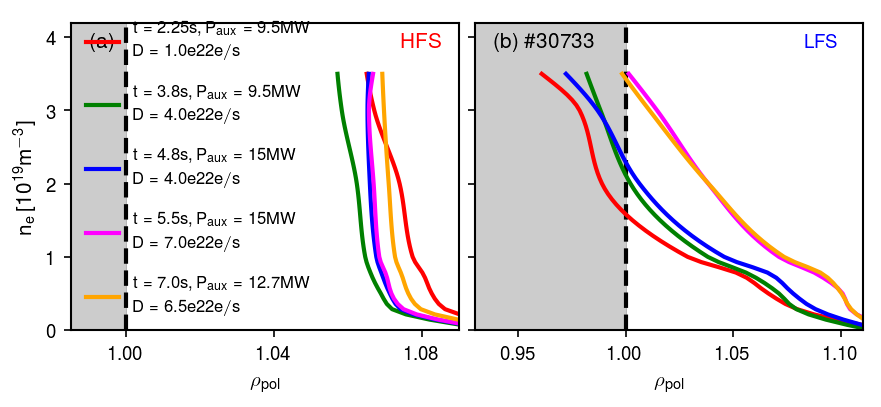

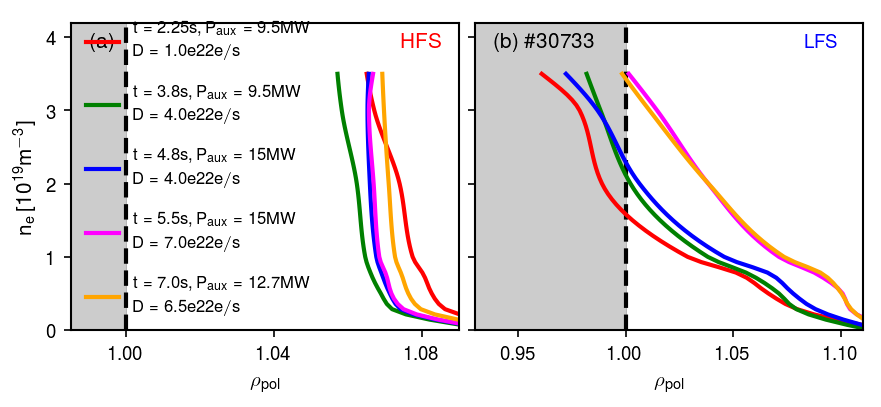

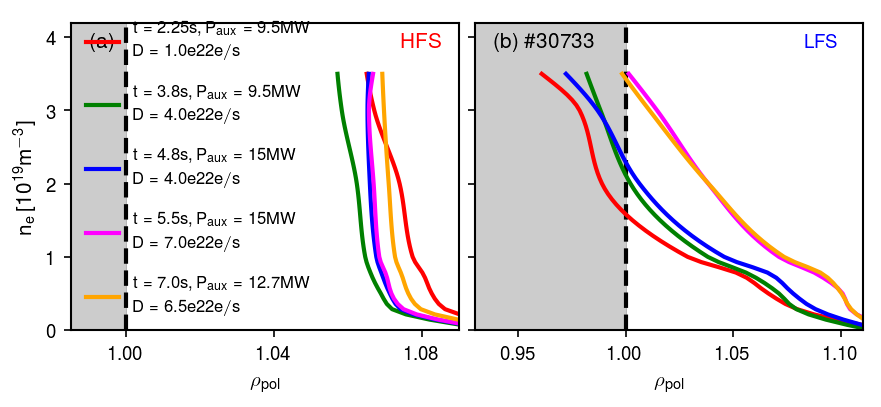

In [7]:
xfigs = 6
yfigs = 2.5

plt.figure(figsize=(xfigs,yfigs),dpi=150)
ax1 = plt.subplot(121)
xi = 0.985
xf = 1.09

dh = np.linspace(0, 3.5)
asp = PchipInterpolator(dh1,perfh1)
#plt.plot(perfh1, dh1, label=labelstr1, color='red', lw=lwid)
plt.plot(asp(dh), dh, label=labelstr1, color='red', lw=lwid)

asp = PchipInterpolator(dh2,perfh2)
plt.plot(asp(dh), dh, label=labelstr2, color='green', lw=lwid)
#plt.plot(perfh2, dh2, label=labelstr2, color='green', lw=lwid)

asp = PchipInterpolator(dh3,perfh3)
plt.plot(asp(dh), dh, label=labelstr3, color='blue', lw=lwid)

asp = PchipInterpolator(dh4,perfh4)
plt.plot(asp(dh), dh, label=labelstr4, color='magenta', lw=lwid)

asp = PchipInterpolator(dh5,perfh5)
plt.plot(asp(dh), dh, label=labelstr5, color='orange', lw=lwid)

plt.xlim([xi,xf])
plt.xticks([1.0,1.04,1.08])
#plt.xticks([0.9,0.95,1.0,1.05,1.1])
plt.ylabel(r"$\mathrm{n_{e}\,[10^{19}m^{-3}}$]", fontsize=ticsize)
plt.axvspan(0., 1., color='black', alpha=alphaval)
plt.axvline(1.0, color='black', lw=2, ls='--')
plt.xlabel(r"$\mathrm{\rho_{pol}}$", fontsize=ticsize)
plt.legend(frameon=False, fontsize=8, loc='lower left', labelspacing=1.5)
plt.text(0.85, 0.92, "HFS", color='r', fontsize=ticsize, transform=ax1.transAxes)

plt.text(0.05, 0.92, "(a)", color='k', fontsize=ticsize, transform=ax1.transAxes)
#######LFS
xi = 0.93
xf = 1.11
ax2 = plt.subplot(122, sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)

plt.text(0.05, 0.92, "(b) \#30733", color='k', fontsize=ticsize, transform=ax2.transAxes)
plt.axvline(1.0, color='black', lw=2, ls='--')
plt.axvspan(0., 1., color='black', alpha=alphaval)

asp = PchipInterpolator(d1,perf1)
plt.plot(asp(dh), dh, label=labelstr1, color='red', lw=lwid)
rhol1 = interp1d(asp(dh), dh, fill_value='extrapolate')
np.savetxt('SupportFiles/perf_attach.txt', np.c_[asp(dh), dh])
#linind = closest(nelin.time, times[0])
#plt.plot(nelin.area.data[linind,:], nelin.data[linind,:]*1e-19, color='r', ls='--', lw=1)

asp = PchipInterpolator(d2,perf2)
plt.plot(asp(dh), dh, label=labelstr2, color='green', lw=lwid)
rhol2 = interp1d(asp(dh), dh, fill_value='extrapolate')
#linind = closest(nelin.time, times[1])
#plt.plot(nelin.area.data[linind,:], nelin.data[linind,:]*1e-19, color='g', ls='--', lw=1)

asp = PchipInterpolator(d3,perf3)
plt.plot(asp(dh), dh,label=labelstr3, color='blue', lw=lwid)
rhol3 = interp1d(asp(dh), dh, fill_value='extrapolate')
#linind = closest(nelin.time, times[2])
#plt.plot(nelin.area.data[linind,:], nelin.data[linind,:]*1e-19, color='blue', ls='--', lw=1)

asp = PchipInterpolator(d4,perf4)
plt.plot(asp(dh), dh, label=labelstr4, color='magenta', lw=lwid)
rhol4 = interp1d(asp(dh), dh, fill_value='extrapolate')
#linind = closest(nelin.time, times[3])
#plt.plot(nelin.area.data[linind,:], nelin.data[linind,:]*1e-19, color='magenta', ls='--', lw=1)

asp = PchipInterpolator(d5,perf5)
plt.plot(asp(dh), dh, label=labelstr5, color='orange', lw=lwid)
rhol5 = interp1d(asp(dh), dh, fill_value='extrapolate')
np.savetxt('SupportFiles/perf_attach.txt', np.c_[asp(dh), dh])
#linind = closest(nelin.time, times[4])
#plt.plot(nelin.area.data[linind,:], nelin.data[linind,:]*1e-19, color='orange', ls='--', lw=1)

#plt.axvline(rausval, color='black', lw=2, ls='--')
plt.xlabel(r"$\mathrm{\rho_{pol}}$", fontsize=ticsize)

plt.text(0.85, 0.92, "LFS", color='b', transform=ax2.transAxes)

plt.xlim([xi, xf])
plt.xticks([0.95,1.0,1.05,1.1])

plt.ylim([0,4.2])
plt.subplots_adjust(left=0.1, bottom=0.16, right=0.98, top=0.98, wspace=0.04, hspace=0.07)
#plt.savefig("rho_"+equil+"_30733_all.png", dpi=300)
#plt.savefig("./Figures/Figure5.png", dpi=300)
plt.show()

# Figure 6 rho scan

In [34]:
import numpy as np
import matplotlib.pylab as plt
from temp_perffromlays import *
from perf2rho import perf2rho
from scipy.interpolate import PchipInterpolator
import dd
from closest import closest
from getsig import getsig
import pandas as pd
import matplotlib.patches as mpatches
#
plt.style.use('helvetpres')
#
ndf = pd.DataFrame.from_csv('./SupportFiles/Pressure_Fuel_30733.csv')

In [54]:
mkr_dict = {'s': 's', '*': '*'}
markr = ['o', 'o', '*', '*', '*']
#colors = ['red', 'green', 'blue', 'magenta', 'orange']
colors = ['#17becf', '#bcbd22','#7f7f7f','#e377c2','#8c564b']
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']
#colors = ['#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']

plt.figure(figsize=(3,3), dpi=100)

for i, ind in zip(ndf.columns[1:6], range(len(ndf.columns[1:6]))):
    for j in range(len(ndf['Fuel'])):
        plt.scatter(ndf['Fuel'][j]*1e-22, ndf[i][j]*100-100, s=60, marker=markr[j], c=colors[ind])


rpa = mpatches.Patch(color=colors[0], label='0.90')
gpa = mpatches.Patch(color=colors[1], label='1.00')
bpa = mpatches.Patch(color=colors[2], label='1.02')
mpa = mpatches.Patch(color=colors[3], label='1.04')
opa = mpatches.Patch(color=colors[4], label='1.06')

circar = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='', label='9.2MW', markersize=10)
starar = plt.Line2D((0,1),(0,0), color='k', marker='*', linestyle='', label='14.6MW', markersize=10)

plt.legend(loc='upper left', handles=[rpa,gpa,bpa,mpa,opa,circar,starar], fontsize=9, frameon=False)
plt.ylabel('Density percentual change', fontsize=10)
plt.xlabel(r'$\mathrm{Fuel\,[10^{22}e/s]}$', fontsize=10)
plt.xlim((0.9,7.1))
plt.yticks([0,20,40,60,80,100,120,140,160],
           ['0\%','20\%','40\%','60\%','80\%','100\%','120\%','140\%','160\%'],
           fontsize=9)

plt.xticks([1,2,3,4,5,6,7], fontsize=9)
plt.text(3.2, 145, '\#30733', fontsize=9)
#plt.show()
#plt.subplots_adjust(left=0.1, bottom=0.12, right=0.99, top=0.97, wspace=0.1, hspace=0.07)
plt.subplots_adjust(left=0.21, bottom=0.155, right=0.99, top=0.97, wspace=0.1, hspace=0.07)
plt.savefig("./Figures/Figure6.png", dpi=300)

# Figure 7 Baratron comparison

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
#
plt.style.use('helvet')
#

In [30]:
inner, outer, tme, newalf, filtlfsnsep, ht, hs, dt, ds, nbt, nbs, h98t, h98s = pickle.load(open('./SupportFiles/baratron_comparison.30733','rb'))

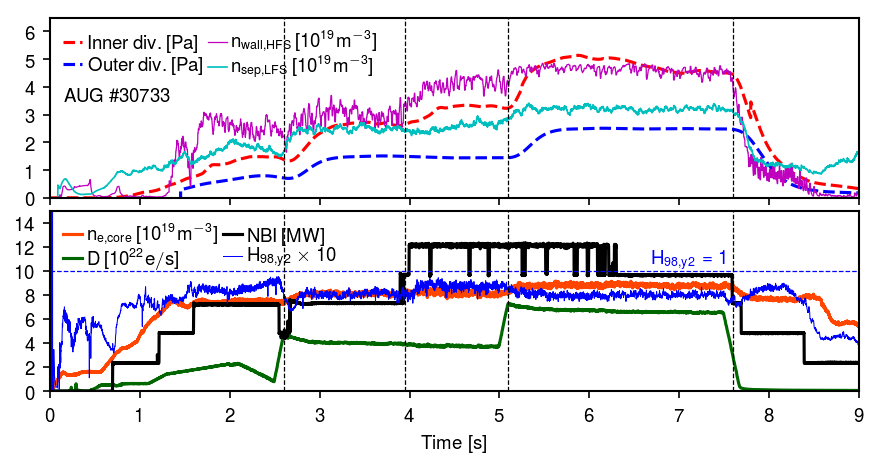

In [31]:
f, axarr = plt.subplots(2, sharex=True, figsize=(6,3),dpi=150)

ax = axarr[0]
fsize = 10

ax.plot(inner.time, inner.data*1e2, label=r"$\mathrm{Inner\,div.\,[Pa]}$", color='r', ls='--')
ax.plot(outer.time, outer.data*1e2, label=r"$\mathrm{Outer\,div.\,[Pa]}$", color='b', ls='--')

ax.plot(tme, newalf, label=r"$\mathrm{n_{wall,HFS}\,[10^{19}m^{-3}]}$", color='m', lw=0.6)

ax.plot(filtlfsnsep[:,0], filtlfsnsep[:,1], label=r"$\mathrm{n_{sep,LFS}\,[10^{19}m^{-3}]}$", color='c', lw=0.8)

ax.text(0.15, 3.5, 'AUG \#30733')

#ax.plot(middle.time, middle.data, label=middle.description)
ax.set_xlim(0,9)
ax.set_ylim(0,6.5)
#ax.set_ylabel('Pressure ['+inner.unit+']')
ax.set_yticks([0,1,2,3,4,5,6])
ax.legend(frameon=False, loc='upper left',borderpad=0.2,ncol=2,
          labelspacing=0.15, columnspacing=0.25, handlelength=1, handletextpad=0.3)

ax = axarr[1]

ax.plot(ht, hs*1e-19, label=r'$\mathrm{n_{e,core}\,[10^{19}m^{-3}]}$', color='orangered')
ax.plot(dt, ds*1e-22, label=r'$\mathrm{D\,[10^{22}e/s]}$', color='#006600')
ax.plot(nbt, nbs*1e-6, label=r'$\mathrm{NBI\,[MW]}$', color='k')
ax.plot(h98t, h98s[:,7]*10, label=r'$\mathrm{H_{98,y2}\times10}$', color='b', lw=0.5)
#ax.plot(h5t, h5s, label='H-5')
ax.set_ylim(0,15)
ax.set_yticks([0,2,4,6,8,10,12,14])
ax.legend(frameon=False, loc='upper left',borderpad=0.2,ncol=2,
          labelspacing=0.15, columnspacing=0.25, handlelength=1, handletextpad=0.3)

ax.axhline(10, color='b', ls='--', lw=0.6)
ax.text(6.7, 10.1, r'$\mathrm{H_{98,y2}=1}$', va='bottom', color='b')

##Add vertical bars
for ax in axarr:
    ax.axvline(x=2.6, color='k', ls='--',lw=0.6)
    ax.axvline(x=3.95, color='k', ls='--',lw=0.6)
    ax.axvline(x=5.1, color='k', ls='--',lw=0.6)
    ax.axvline(x=7.6, color='k', ls='--',lw=0.6)

#for ax in axarr:
#    for tme in timesfit:
#        ax.axvline(x=tme, color='k', ls='--', lw=0.6)

ax.set_xlabel('Time [s]')
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=0.15, right=0.96, top=0.98, wspace=0.04, hspace=0.07)
#plt.savefig('barall_' + str(shotnr) + 'nolines.png', dpi=300)
#plt.savefig('barall_' + str(shotnr) + '.png', dpi=300)
plt.savefig('./Figures/Figure7.png', dpi=300)
plt.show()

# Figure 8 Kallenbach pressure fit

In [65]:
from scipy.optimize import *
from R2calc import R2calc
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import pickle

inner, outer, tme, newalf, filtlfsnsep, ht, hs, dt, ds, nbt, nbs, h98t, h98s = pickle.load(open('./SupportFiles/baratron_comparison.30733','rb'))

npts = 15
timesfit = np.linspace(1.8, 7.5, npts, endpoint=True)
#timesfit = np.array([2.0,2.2,2.4,3.0,3.2,3.6,3.8,4.0,4.1,4.3,4.4, 5.5,6.0,6.5,7.0])
nsepint = interp1d(filtlfsnsep[:,0], filtlfsnsep[:,1])
ldvinp = interp1d(outer.time, outer.data*1e2)

xx = ldvinp(timesfit)
yy = nsepint(timesfit)

In [67]:
def fitfunc(x, a, b,):
    return a*x**b

guess = [2.0, 0.4]
popt, pcov = curve_fit(fitfunc, xx, yy, p0=guess)
#The optimised parameters of the fit
print "popt:", popt
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print "perr:", perr
#The covariance matrix of the parameters
print "pcov:", pcov
R2=R2calc(yy,fitfunc(xx,*popt))
print "R2:", R2

popt: [2.13148464 0.46588731]
perr: [0.03958022 0.02576882]
pcov: [[ 0.00156659 -0.00085584]
 [-0.00085584  0.00066403]]
R2: 0.9689682057592267


In [84]:
plt.figure(figsize=(3,2.5), dpi=100)
plt.scatter(ldvinp(timesfit), nsepint(timesfit), label='Data', s=20)
tt = np.linspace(0.4,3)
plt.plot(tt, fitfunc(tt, *popt), label='Fit, k=%0.2f'%popt[1], color='k')
#plt.legend(frameon=False, loc='lower right')
plt.text(0.4,3.3,"\#30733")
plt.text(1.6,1.74,r'$\mathrm{n_{e,sep}=%0.2f\,P_{0}^{\,%0.2f}}$'%(popt[0],popt[1]),fontsize='10')
plt.text(1.6,1.5,r'$\mathrm{R^{2}=%0.2f}$'%(R2),fontsize='10')
plt.xlabel('Outer div. Pressure [Pa]')
plt.ylabel(r'$\mathrm{n_{e,sep}[10^{19}m^{-3}]}$')
#plt.ylabel(r'$\mathrm{n_{e,sep}\,[10^{19}m^{-3}]}\,$')
plt.tight_layout()
plt.subplots_adjust(left=0.17, bottom=0.165, right=0.98, top=0.98, wspace=0.04, hspace=0.07)
plt.savefig('./Figures/Figure8.png',dpi=300)

# Figure 9 Typical ELM cycle

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sigelmsync import sigelmsync
from starkelmsync import starkelmsync
from readStark import *
import matplotlib.cm as cm
import matplotlib.colors as colors
from getsig import getsig
import dd
#
plt.style.use('helvet')
#
def smooth(data,N=5):
    return np.convolve(data,np.ones(N)/N,'same');

def smooth2d(data,N):
    for i in range(len(data[0,:])):
        data[:,i] = smooth(data[:,i],N)
    return data

shotnr = 30554
ti = 2.52
tf = 2.55
#ti = 2.51
#tf = 2.57
refside="out"
divside=refside
divitem=["jsat","nev"]
lwid = 1

if divside=='in':
    diag_side = 'i'
else:
    diag_side = 'a'

rdl = dd.shotfile("RDL", shotnr, edition=0)
####Parameters for Refplot 

refsgr = "HFSR"        
minyvalh = 1.04
maxyvalh = 1.18
refstrh = r"$\mathrm{HFS\,R[m]}$"

hfsr = rdl(refsgr, tBegin=ti-0.002, tEnd=tf+0.002)

refsgr = "LFSR"
minyvall = 2.08
maxyvall = 2.22
refstrl = r"$\mathrm{LFS\,R[m]}$"

lfsr = rdl(refsgr, tBegin=ti-0.002, tEnd=tf+0.002)
rdl.close()

##Separatix###
fpg = dd.shotfile("FPG", shotnr)
separatrix_signal = "Raus"
sepl = fpg(separatrix_signal, tBegin=ti-0.002, tEnd=tf+0.002)
separatrix_signal = "Rin"
seph = fpg(separatrix_signal, tBegin=ti-0.002, tEnd=tf+0.002)
fpg.close()
##############

#ELM time
elmtime = 2.52474
scale=1e-3

tipl = (ti-elmtime)/scale
tfpl = (tf-elmtime)/scale

#Jsat
prbin = np.loadtxt('/home/guimas/Documents/Publications/hmode2016/Figures/30554/probedata/LSF.ui6')
prbou = np.loadtxt('/home/guimas/Documents/Publications/hmode2016/Figures/30554/probedata/LSF.ua6')
#Ipolsol
spou = getsig(shotnr, 'MAC', 'Ipolsola', tBegin=ti-0.002, tEnd=tf+0.002)
spin = getsig(shotnr, 'MAC', 'Ipolsoli', tBegin=ti-0.002, tEnd=tf+0.002)
#Dalpha
sdou = getsig(shotnr, 'POT', 'ELMa-Han', tBegin=ti-0.002, tEnd=tf+0.002)
sdin = getsig(shotnr, 'POT', 'ELMi-Han', tBegin=ti-0.002, tEnd=tf+0.002)
#Probe Temperature
stou = getsig(shotnr, 'LSD', 'te-ua6', tBegin=ti-0.002, tEnd=tf+0.002)
stin = getsig(shotnr, 'LSD', 'te-ui6', tBegin=ti-0.002, tEnd=tf+0.002)
#Edge interferomter
h5 = getsig(shotnr, 'DCN', 'H-5')

In [15]:
fig = plt.figure(figsize=(3, 5))

gs = mpl.gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[4, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)

ax1.text(0.03, 0.9, '(a)', transform = ax1.transAxes)
ax2.text(0.03, 0.9, '(b)', transform = ax2.transAxes)
ax3.text(0.03, 0.9, '(c)', transform = ax3.transAxes)

############################### First plot
#Plot Raus
ax1.plot((sepl.time-elmtime)/scale, sepl.data, color='k', lw=lwid)
ax1.fill_between((sepl.time-elmtime)/scale, sepl.data, 1.6, color='black', alpha=0.25)

ax1.set_title('\#'+str(shotnr) + r'$\mathrm{\,t_{0}=2.52474\,s}$', loc='left')

#Plot the layers
nchans = 11

## Check densities used (shortcut without dd)
mindens = 0.5
maxdens = 3.25
dens = np.linspace(mindens, maxdens, 12)

fth = []
frh = []
fne = []

for i in range(nchans):
    fth.append(lfsr.time)
    frh.append(lfsr.data[:,i])
    fne.append(dens[i] * np.ones(len(hfsr.time)))

########
fth = np.concatenate(fth)
frh = np.concatenate(frh)
fne = np.concatenate(fne)

########
cmap = cm.get_cmap('jet')
sc = ax1.scatter(fth, frh, c=fne, s=4.0, lw=0, cmap=cmap)
sc.remove()

clrs = cm.jet(np.linspace(0, 1, nchans))
for i in range(nchans):
    ax1.plot((lfsr.time-elmtime)/scale, lfsr.data[:, i], lw=lwid, color=clrs[i])

#cont = ax1.contourf(x, y, z, 20)
#plt.tick_params(which='both', top=False, right=False)

plt.setp(ax1.get_xticklabels(), visible=False)

ax1.set_xlim(tipl,tfpl)
ax1.set_ylim(minyvall, maxyvall)
ax1.set_ylabel(refstrl)
ax1.hlines(1.045, tipl, tfpl, color='black', lw=3)

axins = inset_axes(ax1,
               width="5%", # width = 10% of parent_bbox width
               height="100%", # height : 50%
               loc=6,
               bbox_to_anchor=(1.05, 0., 1, 1),
               bbox_transform=ax1.transAxes,
               borderpad=0,
           )

cbar = plt.colorbar(sc, cax=axins)
cbar.set_label(r'$\mathrm{n_{e}\,[10^{19}m^{-3}]}$')

#####################
## Second plot
#####################
plt.setp(ax2.get_xticklabels(), visible=False)

#Plot Raus
ax2.plot((seph.time-elmtime)/scale, seph.data, color='k', lw=lwid)
ax2.fill_between((seph.time-elmtime)/scale, seph.data, 1.6, color='black', alpha=0.25)

#Plot the layers
nchans = 11

## Check densities used (shortcut without dd)
mindens = 0.5
maxdens = 3.25
dens = np.linspace(mindens, maxdens, 12)

fth = []
frh = []
fne = []

for i in range(nchans):
    fth.append(hfsr.time)
    frh.append(hfsr.data[:,i])
    fne.append(dens[i] * np.ones(len(hfsr.time)))

########
fth = np.concatenate(fth)
frh = np.concatenate(frh)
fne = np.concatenate(fne)

########
cmap = cm.get_cmap('jet')
sc = ax1.scatter((fth-elmtime)/scale, frh, c=fne, s=4.0, lw=0, cmap=cmap)
sc.remove()

clrs = cm.jet(np.linspace(0, 1, nchans))
for i in range(nchans):
    ax2.plot((hfsr.time-elmtime)/scale, hfsr.data[:, i], lw=lwid, color=clrs[i])

#cont = ax1.contourf(x, y, z, 20)
#plt.tick_params(which='both', top=False, right=False)

plt.setp(ax2.get_xticklabels(), visible=False)

ax2.set_xlim(tipl,tfpl)
ax2.set_ylim(minyvalh, maxyvalh)
ax2.set_ylabel(refstrh)
ax2.hlines(1.045, tipl, tfpl, color='black', lw=3)

axins = inset_axes(ax2,
               width="5%", # width = 10% of parent_bbox width
               height="100%", # height : 50%
               loc=6,
               bbox_to_anchor=(1.05, 0., 1, 1),
               bbox_transform=ax2.transAxes,
               borderpad=0,
           )

cbar = plt.colorbar(sc, cax=axins)
cbar.set_label(r'$\mathrm{n_{e}\,[10^{19}m^{-3}]}$')
#####################
## Third plot
#####################
ax3.plot((spin.time-elmtime)/scale, np.abs(spin.data*1e-3), lw=0.5, label=r'HFS', color='r')
ax3.plot((spou.time-elmtime)/scale, np.abs(spou.data*1e-3), lw=0.5, label=r'LFS', color='b')

ax3.set_ylabel(r'$\mathrm{|I_{div}|\,[kA]}$', color='k')

ax3.set_ylim(0,20)

ax3twin = ax3.twinx()
ax3twin.plot((h5.time-elmtime)/scale, h5.data*1e-19, color='g', lw=1)
ax3twin.set_ylabel(r'$\mathrm{n_{e,edge}\,[10^{19}m^{-3}]}$', color='g')
ax3twin.set_ylim(4.5,5.5)

#ax3.legend(frameon=False)
ax3.set_xlabel('$\mathrm{t-t_{ELM}\,[ms]}$')
#####################
#plt.tight_layout()
plt.subplots_adjust(left=0.19, right=0.94,
                    hspace=0.08, bottom=0.09, top=0.94)

plt.savefig('./Figures/Figure9a.png', dpi=300)

In [4]:
fig = plt.figure(figsize=(3, 5), dpi=100)

gs = mpl.gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[4, 1])
ax4 = fig.add_subplot(gs[0, 0])
ax5 = fig.add_subplot(gs[1, 0], sharex=ax4)
ax6 = fig.add_subplot(gs[2, 0], sharex=ax4)

ax4.text(0.03, 0.9, '(d)', transform = ax4.transAxes)
ax5.text(0.03, 0.9, '(e)', transform = ax5.transAxes)
ax6.text(0.03, 0.9, '(f)', transform = ax6.transAxes)

#####################
## First plot
#####################
plt.setp(ax4.get_xticklabels(), visible=False)

ax4.set_title('\#'+str(shotnr) + r'$\mathrm{\,t_{0}=2.52474\,s}$', loc='left')

ax4.plot((prbin[:,0]-elmtime)/scale, prbin[:,1]*1e-22, lw=0.5, label=r'HFS', color='r')
ax4.plot((prbou[:,0]-elmtime)/scale, prbou[:,1]*1e-22, lw=0.5, label=r'LFS', color='b')

ax4.set_ylabel(r'$\mathrm{\Gamma_{D^{+},SP}\,[10^{22}m^{-2}s^{-1}]}$', color='k')
ax4.set_ylim(0, 30)
ax4.legend(frameon=False)
#####################
## Second plot
#####################
plt.setp(ax5.get_xticklabels(), visible=False)

ax5.plot((stin.time-elmtime)/scale, stin.data, lw=0.5, label=r'HFS', color='r')
ax5.plot((stou.time-elmtime)/scale, stou.data, lw=0.5, label=r'LFS', color='b')

ax5.set_ylabel(r'$\mathrm{T_{e,SP}\,[eV]}$', color='k')
ax5.set_xlim(tipl,tfpl)
ax5.set_ylim(0,32)
#####################
## Third plot
#####################
ax6.plot((sdou.time-elmtime)/scale, sdou.data, lw=0.5, color='b', label=r'$\mathrm{D^{\alpha}\,[AU]}$')
ax6.plot((sdin.time-elmtime)/scale, sdin.data, lw=0.5, color='r', label=r'$\mathrm{D^{\alpha}\,[AU]}$')

ax6.set_ylabel(r'$\mathrm{D^{\alpha}\,[AU]}$', color='k')

ax6.set_xlim(tipl,tfpl)
ax6.set_ylim(0, 0.75)

ax6.set_xlabel('$\mathrm{t-t_{ELM}\,[ms]}$')
#####################
#plt.tight_layout()
plt.subplots_adjust(left=0.19, right=0.94,
                    hspace=0.08, bottom=0.09, top=0.94)

plt.savefig('./Figures/Figure9b.png', dpi=300)

In [16]:
%%bash
convert +append ./Figures/Figure9a.png ./Figures/Figure9b.png ./Figures/Figure9.png

# Figures of ELM cycles

# Asymmetry Parameter

# IDA for 30733

In [26]:
from scipy.signal import medfilt

In [38]:
ida = getsig(30733, 'LIN', 'ne')

In [39]:
np.argmin((ida.area.data[1000,:]-1.0)**2)

21

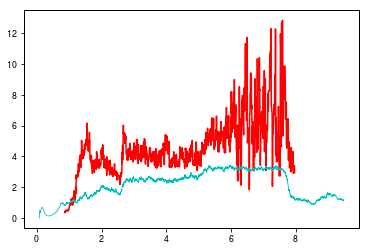

In [44]:
plt.plot(ida.time, medfilt(ida.data[:,21]*1e-19,13))
plt.plot(filtlfsnsep[:,0], filtlfsnsep[:,1], label=r"$\mathrm{n_{sep,LFS}\,[10^{19}m^{-3}]}$", color='c', lw=0.8)

plt.show()

# Neutral pressure gauges for \#30733

In [49]:
try:
    f11 = getsig(30733, 'IOC', 'F11')
except:
    print('No F11')

In [57]:
try:
    f05 = getsig(30733, 'IOC', 'F05')
except:
    print('No such thing')

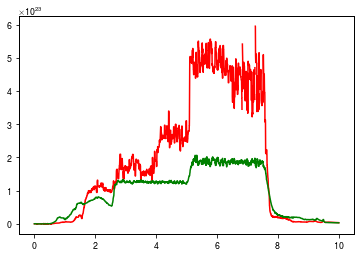

In [66]:
plt.plot(f11.time,medfilt(f11.data,31))
plt.plot(f05.time,medfilt(f05.data,31))
plt.show()